Introduction to Market Basket Analysis in Python

http://pbpython.com/market-basket-analysis.html

In [1]:
#!pip install mlxtend

In [2]:
import mlxtend

mlxtend.__version__

'0.19.0'

In [3]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [25]:
pd.__version__

'1.1.3'

In [4]:
bb_df = pd.read_csv("BB_2014.csv")
bb_df.head()

,SKU,Order,Delivery Date,Description
0,6883056,7998299,2014-04-23,Tide_Naturals Detergent Powder Lemon Chandan
1,6883056,6609767,2014-08-22,Tide_Naturals Detergent Powder Lemon Chandan
2,6883056,7963892,2014-05-05,Tide_Naturals Detergent Powder Lemon Chandan
3,6883056,7883032,2014-06-15,Tide_Naturals Detergent Powder Lemon Chandan
4,6883056,6474677,2014-09-25,Tide_Naturals Detergent Powder Lemon Chandan


In [5]:
len(bb_df.Order.unique())

32531

In [6]:
len(bb_df.SKU.unique())

6956

In [7]:
sku_desc_dict = dict(zip(bb_df.SKU, bb_df.Description))

In [8]:
len(sku_desc_dict)

6956

In [9]:
bb_df.drop( 'Description', axis = 1, inplace = True)

In [10]:
bb_df['Quantity'] = 1

In [11]:
bb_df.head()

,SKU,Order,Delivery Date,Quantity
0,6883056,7998299,2014-04-23,1
1,6883056,6609767,2014-08-22,1
2,6883056,7963892,2014-05-05,1
3,6883056,7883032,2014-06-15,1
4,6883056,6474677,2014-09-25,1


In [23]:
bb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142844 entries, 0 to 142843
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   SKU            142844 non-null  int64 
 1   Order          142844 non-null  int64 
 2   Delivery Date  142844 non-null  object
 3   Quantity       142844 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.4+ MB


In [12]:
bb_pivot_df = bb_df.pivot( index='Order', 
                          columns='SKU', 
                          values = "Quantity" ).reset_index(drop=True)

In [13]:
bb_pivot_df.head(5)

SKU,6883056,15668519,15668520,15668521,15668541,15668542,15670123,15670144,15670145,15670146,...,93302183,93302184,93302186,93303345,93303349,93316685,93316921,93316922,93320243,108525199
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
bb_pivot_df.fillna( 0, inplace = True )

In [15]:
bb_pivot_df.head(5)

SKU,6883056,15668519,15668520,15668521,15668541,15668542,15670123,15670144,15670145,15670146,...,93302183,93302184,93302186,93303345,93303349,93316685,93316921,93316922,93320243,108525199
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
bb_pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32531 entries, 0 to 32530
Columns: 6956 entries, 6883056 to 108525199
dtypes: float64(6956)
memory usage: 1.7 GB


In [16]:
bb_pivot_df.shape

(32531, 6956)

In [18]:
frequent_itemsets = apriori(bb_pivot_df, 
                            min_support=0.003, 
                            use_colnames=True)

In [20]:
frequent_itemsets.tail(10)

,support,itemsets
273,0.003013,"(34994313, 15670251)"
274,0.004365,"(15670251, 34994319)"
275,0.008146,"(34934493, 34936518)"
276,0.003013,"(34935354, 34936518)"
277,0.007162,"(34994312, 34994319)"
278,0.003289,"(34994313, 34994319)"
279,0.003197,"(34995028, 34995070)"
280,0.003105,"(93141022, 93141023)"
281,0.003474,"(93141092, 93141022)"
282,0.004119,"(93141092, 93141023)"


In [21]:
import matplotlib.pyplot as plt

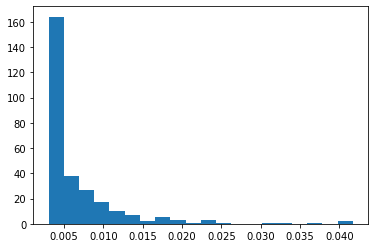

In [22]:
plt.hist(frequent_itemsets.support, bins = 20);

In [26]:
rules = association_rules(frequent_itemsets, 
                          metric="lift", 
                          min_threshold=1)
rules.head(100)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(15670251),(15670157),0.031877,0.007777,0.003566,0.111861,14.383220,0.003318,1.117193
1,(15670157),(15670251),0.007777,0.031877,0.003566,0.458498,14.383220,0.003318,1.787847
2,(34994312),(15670251),0.013925,0.031877,0.003566,0.256071,8.033013,0.003122,1.301364
3,(15670251),(34994312),0.031877,0.013925,0.003566,0.111861,8.033013,0.003122,1.110271
4,(34994313),(15670251),0.013741,0.031877,0.003013,0.219239,6.877605,0.002574,1.239974
5,(15670251),(34994313),0.031877,0.013741,0.003013,0.094503,6.877605,0.002574,1.089192
6,(15670251),(34994319),0.031877,0.017583,0.004365,0.136933,7.787732,0.003805,1.138286
7,(34994319),(15670251),0.017583,0.031877,0.004365,0.248252,7.787732,0.003805,1.287828
8,(34934493),(34936518),0.033906,0.023393,0.008146,0.240254,10.270300,0.007353,1.285438
9,(34936518),(34934493),0.023393,0.033906,0.008146,0.348226,10.270300,0.007353,1.482253


In [27]:
rules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         24 non-null     object 
 1   consequents         24 non-null     object 
 2   antecedent support  24 non-null     float64
 3   consequent support  24 non-null     float64
 4   support             24 non-null     float64
 5   confidence          24 non-null     float64
 6   lift                24 non-null     float64
 7   leverage            24 non-null     float64
 8   conviction          24 non-null     float64
dtypes: float64(7), object(2)
memory usage: 1.8+ KB


In [ ]:
def get_sku_description( skus ):
    all_skus = []
    for sku in skus:
         all_skus.append(sku_desc_dict[sku])
    return ",".join(all_skus)        

In [28]:
rules.antecedents[0]

frozenset({15670251})

In [30]:
rules['antecedents_desc'] = rules.antecedents.map(lambda rec: sku_desc_dict[list(rec)[0]])

In [31]:
rules['consequents_desc'] = rules.consequents.map(lambda rec: sku_desc_dict[list(rec)[0]])

In [32]:
rules.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_desc,consequents_desc
12,(34994312),(34994319),0.013925,0.017583,0.007162,0.514349,29.252238,0.006918,2.022885,TVS Organics_Potato,TVS Organics_Onion Regular
22,(93141092),(93141023),0.008761,0.010605,0.004119,0.470175,44.334137,0.004026,1.867401,Danone_Yoghurt Mango Flavour,Danone_Yoghurt Strawberry Flavour
1,(15670157),(15670251),0.007777,0.031877,0.003566,0.458498,14.383220,0.003318,1.787847,Gopalan Organic_Bhindi,Gopalan Organic_Spinach
21,(93141022),(93141092),0.008361,0.008761,0.003474,0.415441,47.420059,0.003400,1.695705,Danone_Yoghurt Vanilla Flavour,Danone_Yoghurt Mango Flavour
13,(34994319),(34994312),0.017583,0.013925,0.007162,0.407343,29.252238,0.006918,1.663819,TVS Organics_Onion Regular,TVS Organics_Potato
20,(93141092),(93141022),0.008761,0.008361,0.003474,0.396491,47.420059,0.003400,1.643122,Danone_Yoghurt Mango Flavour,Danone_Yoghurt Vanilla Flavour
23,(93141023),(93141092),0.010605,0.008761,0.004119,0.388406,44.334137,0.004026,1.620746,Danone_Yoghurt Strawberry Flavour,Danone_Yoghurt Mango Flavour
18,(93141022),(93141023),0.008361,0.010605,0.003105,0.371324,35.013118,0.003016,1.573774,Danone_Yoghurt Vanilla Flavour,Danone_Yoghurt Strawberry Flavour
9,(34936518),(34934493),0.023393,0.033906,0.008146,0.348226,10.270300,0.007353,1.482253,Fab 360_Fabric Washing Liquid,Bingo_Yumitos Original Style Salt Sprinkled
16,(34995028),(34995070),0.009775,0.010728,0.003197,0.327044,30.484439,0.003092,1.470039,Ambrosia_Capsicum Green,Ambrosia_Ladies Finger
